___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics Module</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

### Some Reminders on Exploratory data analysis (EDA)

Exploratory data analysis (EDA) is an especially important activity in the routine of a data analyst or scientist. It enables an in depth understanding of the dataset, define or discard hypotheses and create predictive models on a solid basis. It uses data manipulation techniques and several statistical tools to describe and understand the relationship between variables and how these can impact business. By means of EDA, we can obtain meaningful insights that can impact analysis under the following questions (If a checklist is good enough for pilots to use every flight, it’s good enough for data scientists to use with every dataset).
1. What question are you trying to solve (or prove wrong)?
2. What kind of data do you have?
3. What’s missing from the data?
4. Where are the outliers?
5. How can you add, change or remove features to get more out of your data?

**``Exploratory data analysis (EDA)``** is often an **iterative brainstorming process** where you pose a question, review the data, and develop further questions to investigate before beginning model development work. The image below shows how the brainstorming phase is connected with that of understanding the variables and how this in turn is connected again with the brainstorming phase.<br>

<img src=https://i.ibb.co/k0MC950/EDA-Process.png width="300" height="100">

[Image Credit: Andrew D.](https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee)

**``In this context, the project consists of 3 parts in general:``**
* **The first part** is related to 'Data Cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, and Dropping useless columns.
* **The second part** is related to 'Filling Data', in other words 'Imputation'. It deals with Missing Values. Categorical to numeric transformation is done as well.
* **The third part** is related to 'Handling Outliers of Data' via Visualization libraries. So, some insights will be extracted.

**``NOTE:``**  However, you are free to create your own style. You do NOT have to stick to the steps above. We, the DA & DV instructors, recommend you study each part separately to create a source notebook for each part title for your further studies. 

# PART- 3 `( Handling With Outliers )`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns

import warnings

import math

# Statistics functions
from scipy.stats import norm
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

C:\Users\hbpbn\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Suppressing a warning 
warnings.filterwarnings("ignore") 

# It is a magic function that renders the figure in the notebook
%matplotlib inline 

# Changing the figure size of a seaborn axes 
sns.set(rc={"figure.figsize": (10, 6)})

# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid")

# To display maximum columns
pd.set_option('display.max_columns', None)

# To display maximum columns
# pd.set_option('display.max_rows', None)

pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [3]:
import re 

def get_diff_category_column(Series:pd.Series, exclude=''',/\n''', pattern=r'''[,\n]| /''', strip='''' "!?|.,*+-_/][''', diff_value=list()):  
    diff_value.clear()
    column = Series.dropna().apply(str).str.strip(strip)
    for row in column:
        if not any(x in exclude for x in row) and row not in diff_value:
            diff_value.append(row)
        else:
            for data in map(lambda x: x.strip(strip), filter(None, re.split(pattern, row))):
                if data not in diff_value:
                    diff_value.append(data)
    return dict(enumerate(sorted(diff_value)))

In [4]:
df = pd.read_csv("filled_autoscout.csv")

In [5]:
df.head()

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,country_version,consumption_comb,consumption_city,consumption_country,age
0,Sedans,15770.000,VAT deductible,56013.000,66.000,Used,2.000,0.000,Audi,A1,Black,Metallic,Cloth,5.000,5.000,Automatic,1422.000,3.000,1220.000,front,Diesel,99.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",7.000,Unknown,3.800,4.300,3.500,3.000
1,Sedans,14500.000,Price negotiable,80000.000,141.000,Used,1.000,0.000,Audi,A1,Red,Metallic,Cloth,3.000,4.000,Automatic,1798.000,4.000,1255.000,front,Benzine,129.000,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",7.000,Unknown,5.600,7.100,4.700,2.000
2,Sedans,14640.000,VAT deductible,83450.000,85.000,Used,1.000,0.000,Audi,A1,Black,Metallic,Cloth,4.000,4.000,Automatic,1598.000,3.000,1195.000,front,Diesel,99.000,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",7.000,Unknown,3.800,4.400,3.400,3.000
3,Sedans,14500.000,VAT deductible,73000.000,66.000,Used,1.000,0.000,Audi,A1,Brown,Metallic,Cloth,3.000,4.000,Automatic,1422.000,3.000,1195.000,front,Diesel,99.000,Euro 6,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",6.000,Unknown,3.800,4.300,3.500,3.000
4,Sedans,16790.000,VAT deductible,16200.000,66.000,Used,1.000,0.000,Audi,A1,Black,Metallic,Cloth,5.000,5.000,Automatic,1422.000,3.000,1195.000,front,Diesel,109.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",6.000,Germany,4.100,4.600,3.800,3.000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   body_type               15919 non-null  object 
 1   price_€                 15919 non-null  float64
 2   vat                     15919 non-null  object 
 3   km                      15919 non-null  float64
 4   hp_kW                   15919 non-null  float64
 5   type                    15919 non-null  object 
 6   previous_owners         15919 non-null  float64
 7   warranty                15919 non-null  float64
 8   make                    15919 non-null  object 
 9   model                   15919 non-null  object 
 10  body_color              15919 non-null  object 
 11  paint_type              15919 non-null  object 
 12  upholstery              15919 non-null  object 
 13  nr_of_doors             15919 non-null  float64
 14  nr_of_seats             15919 non-null

In [7]:
def detect_outlier(col):
    print('column name : ',col)
    print("--"*20)
    Q1 = df[col].quantile(0.25)
    print("Q1 : ", Q1)
    Q3 = df[col].quantile(0.75)
    print("Q3 : ", Q3)
    IQR = Q3 - Q1
    print("IQR : ", IQR )
    print("mean : ", round(df[col].mean(), 2))
    print("median : ", df[col].median())
    lower_lim = Q1 - 1.5*IQR
    print("lower limit : ", lower_lim)
    upper_lim = Q3 +1.5*IQR
    print("upper limit : ", upper_lim)
    cnt_of_low = (df[col] < lower_lim).sum()
    print("count of lower values : ", cnt_of_low)
    cnt_of_upper = (df[col] > upper_lim).sum()
    print("count of upper values : ", cnt_of_upper)
    print(" ")
    print("the smallest 10 values :\n", df[col].sort_values().head(10))
    print(" ")
    print("the biggest 10 values :\n", df[col].sort_values(ascending = False).head(10))
    
    print("\n\n")

In [8]:
for i in df.select_dtypes(exclude="O").columns:
    detect_outlier(i)

column name :  price_€
----------------------------------------
Q1 :  12850.0
Q3 :  21900.0
IQR :  9050.0
mean :  18019.9
median :  16900.0
lower limit :  -725.0
upper limit :  35475.0
count of lower values :  0
count of upper values :  479
 
the smallest 10 values :
 8594      13.000
8828     120.000
6066     255.000
8829     331.000
8827    4950.000
8825    4990.000
8826    5250.000
8824    5300.000
13770   5445.000
8823    5450.000
Name: price_€, dtype: float64
 
the biggest 10 values :
 3648    74600.000
15826   68320.000
3649    67600.000
3587    64900.000
15828   64332.000
15831   64298.000
3595    63900.000
15833   63477.000
3590    62900.000
3594    58990.000
Name: price_€, dtype: float64



column name :  km
----------------------------------------
Q1 :  2000.0
Q3 :  46898.5
IQR :  44898.5
mean :  31964.85
median :  20410.0
lower limit :  -65347.75
upper limit :  114246.25
count of lower values :  0
count of upper values :  691
 
the smallest 10 values :
 14518   0.000
9892   

the biggest 10 values :
 535     19.900
10513   16.100
12054   11.500
12529   11.500
12553   11.500
10515   11.500
10771   11.300
3599    11.300
3601    11.300
3602    11.300
Name: consumption_city, dtype: float64



column name :  consumption_country
----------------------------------------
Q1 :  3.7
Q3 :  4.6
IQR :  0.8999999999999995
mean :  4.21
median :  4.2
lower limit :  2.350000000000001
upper limit :  5.949999999999999
count of lower values :  0
count of upper values :  171
 
the smallest 10 values :
 3290   2.832
3268   2.832
8930   2.894
8851   2.894
8948   2.894
8827   2.894
8932   2.894
8933   2.894
8934   2.894
8935   2.894
Name: consumption_country, dtype: float64
 
the biggest 10 values :
 535     10.300
10819   10.110
10817   10.110
10759    8.600
10755    8.600
10758    8.600
10771    7.800
10764    7.800
10860    7.800
10866    7.800
Name: consumption_country, dtype: float64



column name :  age
----------------------------------------
Q1 :  0.0
Q3 :  2.0
IQR :  2.0

## price_€

In [9]:
detect_outlier("price_€")

column name :  price_€
----------------------------------------
Q1 :  12850.0
Q3 :  21900.0
IQR :  9050.0
mean :  18019.9
median :  16900.0
lower limit :  -725.0
upper limit :  35475.0
count of lower values :  0
count of upper values :  479
 
the smallest 10 values :
 8594      13.000
8828     120.000
6066     255.000
8829     331.000
8827    4950.000
8825    4990.000
8826    5250.000
8824    5300.000
13770   5445.000
8823    5450.000
Name: price_€, dtype: float64
 
the biggest 10 values :
 3648    74600.000
15826   68320.000
3649    67600.000
3587    64900.000
15828   64332.000
15831   64298.000
3595    63900.000
15833   63477.000
3590    62900.000
3594    58990.000
Name: price_€, dtype: float64





<AxesSubplot:xlabel='price_€'>

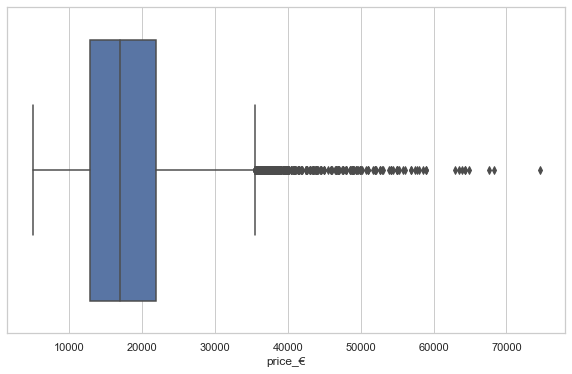

In [99]:
sns.boxplot(x=df["price_€"])

In [10]:
# Even if There is no extreme lower value in dataset, There are 4 tiny valuee for price_€ columns such as 13.0, 120.0, 255.0, 331.0


In [11]:
df.loc[df["price_€"] < 332.0,  ["price_€"]] = np.nan

In [12]:
df["price_€"].isnull().sum()

4

In [13]:
df["price_€"] = df.groupby(["make", "model", "body_type", "age"])["price_€"].apply(lambda x : x.fillna(round(x.mean(), 0)))

## km

In [14]:
detect_outlier("km")

column name :  km
----------------------------------------
Q1 :  2000.0
Q3 :  46898.5
IQR :  44898.5
mean :  31964.85
median :  20410.0
lower limit :  -65347.75
upper limit :  114246.25
count of lower values :  0
count of upper values :  691
 
the smallest 10 values :
 14518   0.000
9892    0.000
2496    0.000
9882    0.000
15668   0.000
5553    0.000
12512   0.000
5672    0.000
9929    0.000
7828    0.000
Name: km, dtype: float64
 
the biggest 10 values :
 9279    317000.000
3003    291800.000
5712    260000.000
6224    248000.000
15277   240000.000
10804   232000.000
6380    231879.000
6062    230928.000
6399    229500.000
10495   222346.000
Name: km, dtype: float64





<AxesSubplot:xlabel='km'>

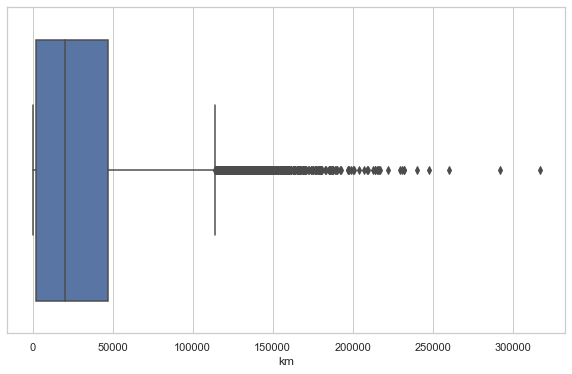

In [100]:
sns.boxplot(x=df["km"])

In [15]:
df.iloc[df.km.sort_values(ascending=False).head(10).index]

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,country_version,consumption_comb,consumption_city,consumption_country,age
9279,Sedans,8350.000,VAT deductible,317000.000,66.000,Used,1.000,0.000,Opel,Corsa,Red,Metallic,Cloth,3.000,5.000,Manual,1398.000,4.000,1199.000,front,Benzine,136.000,Euro 6d-TEMP,"Air conditioning,Hill Holder,Power windows",On-board computer,Alloy wheels,"ABS,Central door lock with remote control,Dayt...",5.000,Unknown,5.974,7.400,5.100,2.000
3003,Sedans,14980.000,VAT deductible,291800.000,110.000,Used,1.000,0.000,Audi,A3,Blue,Metallic,Cloth,4.000,5.000,Manual,1968.000,4.000,1350.000,4WD,Diesel,125.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Adaptive headlights,Central door lock,Dayt...",6.000,Germany,4.700,5.600,4.100,3.000
5712,Station wagon,6000.000,VAT deductible,260000.000,100.000,Used,1.000,0.000,Opel,Astra,Silver,Metallic,Cloth,5.000,5.000,Automatic,1598.000,4.000,1425.000,front,Diesel,119.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Roof rack,Touch screen,Trailer hi...","ABS,Central door lock,Central door lock with r...",6.000,Germany,4.500,5.700,3.800,3.000
6224,Station wagon,9800.000,VAT deductible,248000.000,81.000,Used,1.000,0.000,Opel,Astra,White,Metallic,Cloth,4.000,4.000,Manual,1686.000,4.000,1523.000,front,Diesel,120.000,Euro 5,"Air conditioning,Armrest,Electrical side mirro...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Touch screen,"ABS,Alarm system,Central door lock,Electronic ...",6.000,Unknown,4.500,5.400,3.948,3.000
15277,Van,14600.000,VAT deductible,240000.000,118.000,Used,1.000,0.000,Renault,Espace,White,Metallic,Part leather,5.000,5.000,Automatic,1598.000,4.000,1659.000,front,Diesel,120.000,Euro 6,"Air conditioning,Automatic climate control,Cru...",Sound system,Alloy wheels,"ABS,Central door lock with remote control,Driv...",6.000,Unknown,4.600,4.926,4.400,2.000
10804,Station wagon,10850.000,VAT deductible,232000.000,125.000,Used,1.000,0.000,Opel,Insignia,White,Metallic,Cloth,4.000,5.000,Automatic,1956.000,4.000,1623.000,front,Diesel,146.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...",On-board computer,Roof rack,"ABS,Central door lock,Daytime running lights,D...",6.000,Unknown,5.500,7.700,4.200,3.000
6380,Station wagon,7990.000,VAT deductible,231879.000,118.000,Used,1.000,0.000,Opel,Astra,Black,Metallic,Cloth,4.000,5.000,Manual,1598.000,4.000,1393.000,front,Diesel,101.000,Euro 6,"Air conditioning,Electrical side mirrors,Multi...","Bluetooth,On-board computer,Radio","Roof rack,Trailer hitch","ABS,Central door lock,Driver-side airbag,Elect...",6.000,Unknown,3.652,3.900,3.500,3.000
6062,Station wagon,8980.000,VAT deductible,230928.000,100.000,Used,1.000,0.000,Opel,Astra,Black,Metallic,Full leather,4.000,5.000,Automatic,1598.000,4.000,1393.000,front,Diesel,101.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,On-board computer,Radio","Alloy wheels,Roof rack,Sport seats,Trailer hitch","ABS,Central door lock,Driver-side airbag,Fog l...",6.000,Unknown,4.522,5.700,3.800,3.000
6399,Station wagon,6990.000,VAT deductible,229500.000,100.000,Used,2.000,0.000,Opel,Astra,Black,Metallic,Cloth,5.000,5.000,Manual,1598.000,4.000,1518.000,front,Diesel,104.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Roof rack,Voice Control,Winter tyres","ABS,Central door lock,Central door lock with r...",6.000,Unknown,3.900,4.600,3.600,3.000
10495,Station wagon,9500.000,VAT deductible,222346.000,125.000,Used,1.000,0.000,Opel,Insignia,Silver

In [16]:
df.groupby("age")["km"].mean()

age
0.000    1328.472
1.000   17922.140
2.000   41525.294
3.000   77442.521
Name: km, dtype: float64

In [17]:
df.groupby("age")["km"].min()

age
0.000    0.000
1.000    1.000
2.000    1.000
3.000   10.000
Name: km, dtype: float64

In [18]:
df.groupby("age")["km"].max()

age
0.000   127022.000
1.000   136000.000
2.000   317000.000
3.000   291800.000
Name: km, dtype: float64

In [20]:
df[df["age"] == 1]["km"]

10      11300.000
16       9752.000
19      13406.000
23       9077.000
24       3000.000
           ...   
15789   15000.000
15790      50.000
15791   10803.000
15793       1.000
15795       1.000
Name: km, Length: 4525, dtype: float64

## hp_kW

In [21]:
detect_outlier("hp_kW")

column name :  hp_kW
----------------------------------------
Q1 :  66.0
Q3 :  101.0
IQR :  35.0
mean :  88.37
median :  85.0
lower limit :  13.5
upper limit :  153.5
count of lower values :  22
count of upper values :  406
 
the smallest 10 values :
 6034   1.000
7019   1.000
7014   1.000
9285   1.000
6005   1.000
9287   1.000
9288   1.000
7018   1.000
9289   1.000
9290   1.000
Name: hp_kW, dtype: float64
 
the biggest 10 values :
 3595   294.000
3606   294.000
3587   294.000
3590   294.000
3592   294.000
3593   294.000
3596   294.000
3598   294.000
3599   294.000
3600   294.000
Name: hp_kW, dtype: float64





<AxesSubplot:xlabel='hp_kW'>

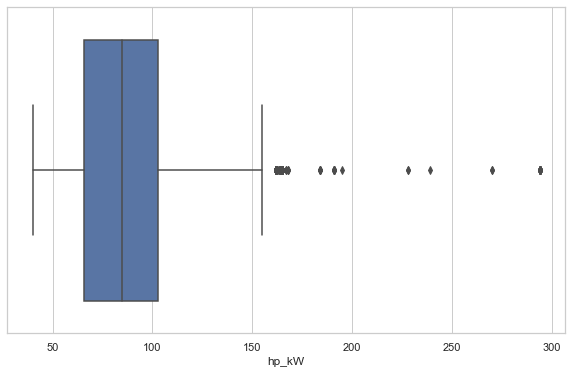

In [101]:
sns.boxplot(x=df["hp_kW"])

In [22]:
# the hp_kw values for opel corsa is min=33 max=155

In [23]:
Q1 = df.hp_kW.quantile(0.25)
Q3 = df.hp_kW.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [24]:
df[df.hp_kW > upper_limit].sort_values(by="hp_kW", ascending=True)

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,country_version,consumption_comb,consumption_city,consumption_country,age
12437,Sedans,38950.000,VAT deductible,15000.000,154.000,Used,1.000,0.000,Opel,Insignia,White,Metallic,Full leather,5.000,5.000,Automatic,1956.000,4.000,1503.000,4WD,Diesel,181.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,M...","Alloy wheels,Catalytic Converter,Sport package...","ABS,Adaptive headlights,Blind spot monitor,Cen...",8.000,Unknown,6.900,9.200,5.500,0.000
12520,Station wagon,36450.000,VAT deductible,10.000,154.000,Pre-registered,1.000,1.000,Opel,Insignia,Black,Metallic,Full leather,4.000,5.000,Automatic,2000.000,4.000,1623.000,4WD,Diesel,187.000,Euro 6d-TEMP,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Roof rack,Sport package,Sport sea...","ABS,Adaptive headlights,Blind spot monitor,Cen...",8.000,Unknown,7.100,9.600,5.600,0.000
12519,Station wagon,36490.000,VAT deductible,10.000,154.000,New,0.000,1.000,Opel,Insignia,White,Metallic,Full leather,4.000,5.000,Automatic,2000.000,4.000,1623.000,4WD,Diesel,187.000,Euro 6d-TEMP,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Roof rack,Shift paddles,Sport pac...","ABS,Adaptive Cruise Control,Adaptive headlight...",8.000,European Union,7.100,9.600,5.600,0.000
12518,Station wagon,36490.000,VAT deductible,10.000,154.000,New,0.000,1.000,Opel,Insignia,White,Metallic,Full leather,4.000,5.000,Automatic,2000.000,4.000,1623.000,4WD,Diesel,187.000,Euro 6d-TEMP,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Roof rack,Shift paddles,Sport pac...","ABS,Adaptive headlights,Blind spot monitor,Cen...",8.000,European Union,7.100,9.600,5.600,0.000
12509,Sedans,36771.000,VAT deductible,16.987,154.000,New,0.000,0.000,Opel,Insignia,Beige,Metallic,Full leather,5.000,5.000,Automatic,1956.000,4.000,1772.000,4WD,Diesel,187.000,Euro 6c,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Shift paddles,Touch screen,Voice ...","ABS,Adaptive headlights,Central door lock,Dayt...",8.000,Germany,7.100,9.400,5.800,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3605,Sedans,51999.000,VAT deductible,33000.000,294.000,Used,1.000,0.000,Audi,A3,White,Metallic,Full leather,5.000,5.000,Semi-automatic,2480.000,5.000,1585.000,4WD,Benzine,189.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Catalytic Converter,Shift paddles...","ABS,Adaptive Cruise Control,Adaptive headlight...",7.000,Italy,8.300,11.300,6.600,2.000
3606,Sedans,49900.000,VAT deductible,17234.000,294.000,Used,1.000,0.000,Audi,A3,Black,Metallic,Part leather,5.000,5.000,Semi-automatic,2480.000,5.000,1585.000,front,Benzine,189.000,Euro 6,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.000,Unknown,8.300,11.300,6.600,1.000
3610,Sedans,45890.000,VAT deductible,18700.000,294.000,Used,1.000,0.000,Audi,A3,White,Metallic,Part leather,5.000,5.000,Semi-automatic,2480.000,5.000,1585.000,front,Benzine,189.000,Euro 6,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.000,Italy,8.300,11.300,6.600,1.000
3601,Sedans,51900.000,VAT deductible,19000.000,294.000,Used,1.000,0.000,Audi,A3,Black,Metallic,Full leather,5.000,5.000,Semi-automatic,2480.000,5.000,158

In [25]:
# we detected that upper values can be normal values for hp_kW (>153.5), but it'not impossible value for hp_kW such as 1,9...

In [26]:
df["hp_kW"] = df["hp_kW"].apply(lambda x: np.nan if x < 33 else x)

In [27]:
df.hp_kW.isnull().sum()

22

In [28]:
df.hp_kW = df.groupby(["make", "model","drive_chain","engine_displacement_cc"])["hp_kW"].apply(lambda x : x.fillna(x.median() if x.median() > 1 else df.hp_kW.median()))


In [29]:
df.hp_kW.isnull().sum()

0

<AxesSubplot:xlabel='hp_kW'>

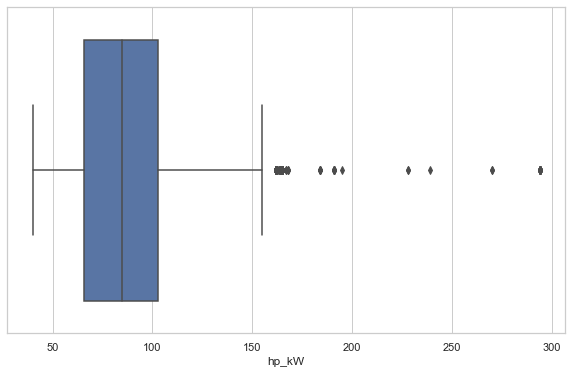

In [102]:
sns.boxplot(x=df["hp_kW"])

## previous_owners

In [30]:
detect_outlier("previous_owners")

column name :  previous_owners
----------------------------------------
Q1 :  1.0
Q3 :  1.0
IQR :  0.0
mean :  0.95
median :  1.0
lower limit :  1.0
upper limit :  1.0
count of lower values :  1659
count of upper values :  797
 
the smallest 10 values :
 2295    0.000
1697    0.000
12697   0.000
12696   0.000
12694   0.000
12693   0.000
12692   0.000
12691   0.000
12690   0.000
12689   0.000
Name: previous_owners, dtype: float64
 
the biggest 10 values :
 15256   4.000
972     4.000
14994   3.000
9478    3.000
10770   3.000
13560   3.000
1290    3.000
11443   3.000
13568   3.000
15007   3.000
Name: previous_owners, dtype: float64





In [31]:
# There is nothing to do in this column

## warranty

In [32]:
df.warranty.value_counts()

0.000    11066
1.000     4853
Name: warranty, dtype: int64

## nr_of_doors

In [33]:
df.nr_of_doors.value_counts()

5.000    11787
4.000     3079
3.000      832
2.000      219
1.000        1
7.000        1
Name: nr_of_doors, dtype: int64

<AxesSubplot:xlabel='nr_of_doors'>

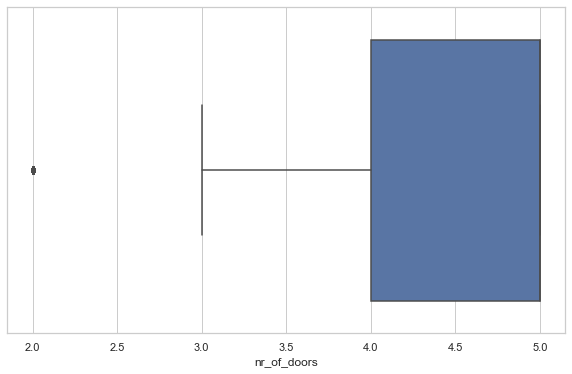

In [104]:
sns.boxplot(x=df["nr_of_doors"])

In [34]:
df[df.nr_of_doors == 1]

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,country_version,consumption_comb,consumption_city,consumption_country,age
13782,Compact,8500.000,VAT deductible,41493.000,55.000,Used,1.000,1.000,Renault,Clio,White,Metallic,Cloth,1.000,5.000,Manual,1461.000,4.000,1090.000,front,Diesel,85.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Shift paddles,Sport package,Sport...","ABS,Adaptive headlights,Central door lock,Dayt...",6.000,Unknown,3.252,3.500,3.100,3.000


In [35]:
df[df.nr_of_doors == 7]

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,country_version,consumption_comb,consumption_city,consumption_country,age
15202,Van,21600.000,Price negotiable,78000.000,118.000,Used,1.000,0.000,Renault,Espace,Brown,Metallic,Full leather,7.000,5.000,Automatic,1598.000,4.000,1734.000,front,Diesel,120.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,MP3,On-board computer,...","Alloy wheels,Touch screen","ABS,Blind spot monitor,Central door lock,Dayti...",6.000,Unknown,4.600,4.926,4.400,3.000


In [36]:
df.loc[(df.nr_of_doors == 1) | (df.nr_of_doors == 7), "nr_of_doors"] = 5

In [37]:
df.loc[(df.nr_of_doors == 1) | (df.nr_of_doors == 7), "nr_of_doors"]

Series([], Name: nr_of_doors, dtype: float64)

<AxesSubplot:xlabel='nr_of_doors'>

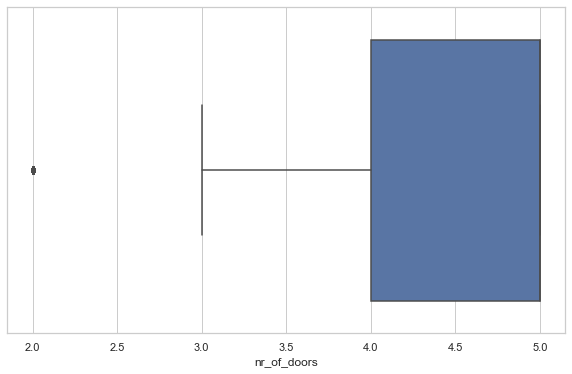

In [105]:
sns.boxplot(x=df["nr_of_doors"])

## nr_of_seats

In [38]:
df.nr_of_seats.value_counts()

5.000    14308
4.000     1127
7.000      362
2.000      119
6.000        2
3.000        1
Name: nr_of_seats, dtype: int64

<AxesSubplot:xlabel='nr_of_seats'>

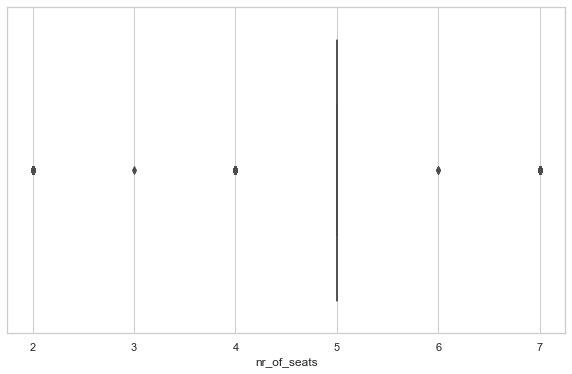

In [106]:
sns.boxplot(x=df["nr_of_seats"])

In [39]:
df[df["nr_of_seats"] == 7][["make", "model", "body_type"]].value_counts()



make     model   body_type    
Renault  Espace  Van              315
                 Station wagon     19
                 Transporter       16
                 Sedans             4
                 Off-Road           3
                 Other              3
                 Compact            2
dtype: int64

In [40]:
# There is nothing to do in this column

<AxesSubplot:xlabel='nr_of_seats'>

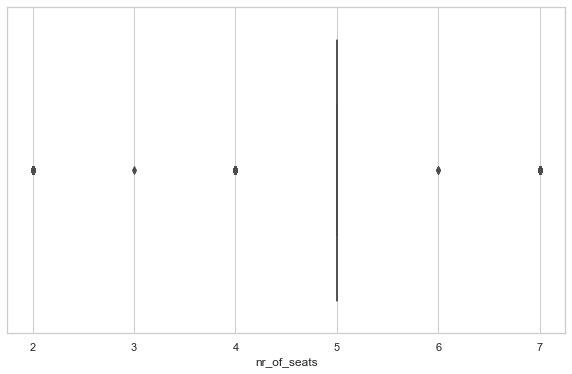

In [107]:
sns.boxplot(x=df["nr_of_seats"])

## engine_displacement_cc

In [41]:
df["engine_displacement_cc"].sort_values(ascending=True).head(60)

14315     1.000
12473     1.000
12484     1.000
14328     1.000
14327     1.000
14326     1.000
13904     1.000
14325     1.000
14324     1.000
14322     1.000
14321     1.000
14320     1.000
14319     1.000
12499     1.000
12501     1.000
12554     1.000
12604     1.000
14314     1.000
12768     1.000
12769     1.000
12781     1.000
12783     1.000
12786     1.000
12790     1.000
12467     1.000
12796     1.000
12800     1.000
12815     1.000
12823     1.000
12835     1.000
12848     1.000
12849     1.000
12798     1.000
12750     1.000
12670     1.000
14284     1.000
10559     2.000
14198     2.000
13912    54.000
10194   122.000
7811    139.000
7810    139.000
7809    139.000
7812    139.000
8128    140.000
15574   160.000
15576   160.000
15577   160.000
15578   160.000
15579   160.000
15575   160.000
13653   890.000
14668   898.000
14667   898.000
14666   898.000
14665   898.000
14620   898.000
14663   898.000
14619   898.000
14661   898.000
Name: engine_displacement_cc, dtype: flo

<AxesSubplot:xlabel='engine_displacement_cc'>

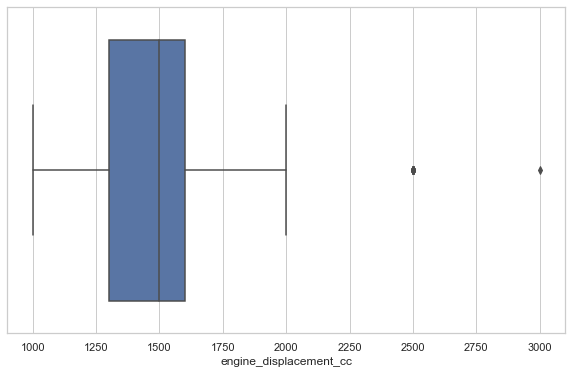

In [108]:
sns.boxplot(x=df["engine_displacement_cc"])

In [42]:
df.loc[df.engine_displacement_cc < 800][["make", "model"]].value_counts()

make     model   
Opel     Insignia    24
Renault  Clio        15
         Espace       6
Opel     Astra        5
         Corsa        1
dtype: int64

In [43]:
df["engine_displacement_cc"].sort_values(ascending=False)

10932   16000.000
7169    15898.000
10771    2967.000
3609     2480.000
3604     2480.000
           ...   
13904       1.000
12467       1.000
12473       1.000
12484       1.000
14314       1.000
Name: engine_displacement_cc, Length: 15919, dtype: float64

In [44]:
df.loc[(df.engine_displacement_cc > 3000), "engine_displacement_cc"] = df.engine_displacement_cc/10


In [45]:
df.iloc[[10932, 7169]]

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,country_version,consumption_comb,consumption_city,consumption_country,age
10932,Station wagon,14300.000,Price negotiable,76500.000,88.000,Used,1.000,0.000,Opel,Insignia,Grey,Metallic,Full leather,5.000,5.000,Manual,1600.000,4.000,1623.000,front,Diesel,135.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Touch screen,Voice Control","ABS,Central door lock,Daytime running lights,D...",6.000,Unknown,4.500,5.700,3.765,3.000
7169,Station wagon,18490.000,VAT deductible,22327.000,100.000,Employee's car,1.000,0.000,Opel,Astra,Green,Metallic,Cloth,5.000,5.000,Automatic,1589.800,4.000,1393.000,front,Benzine,119.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Touch screen,Voice Control","ABS,Central door lock,Daytime running lights,D...",6.000,Unknown,4.500,5.700,3.800,1.000


In [46]:
df.loc[(df.engine_displacement_cc < 800), "engine_displacement_cc"] = np.nan


In [47]:
df.engine_displacement_cc.isnull().sum()

51

In [48]:
df.loc[(df.engine_displacement_cc < 800), "engine_displacement_cc"]

Series([], Name: engine_displacement_cc, dtype: float64)

In [49]:
df.engine_displacement_cc = df.groupby(["make","model", "cylinders", "hp_kW"])["engine_displacement_cc"].apply(lambda x : x.fillna(x.median() if x.median() > 0 else df.engine_displacement_cc.median()))

In [50]:
df.engine_displacement_cc.isnull().sum()

0

In [51]:
df.loc[df.engine_displacement_cc > 2500, "engine_displacement_cc" ] = 3.0
df.loc[df.engine_displacement_cc > 2000, "engine_displacement_cc" ] = 2.5
df.loc[df.engine_displacement_cc > 1800, "engine_displacement_cc" ] = 2.0
df.loc[df.engine_displacement_cc > 1600, "engine_displacement_cc" ] = 1.8
df.loc[df.engine_displacement_cc > 1500, "engine_displacement_cc" ] = 1.6
df.loc[df.engine_displacement_cc > 1400, "engine_displacement_cc" ] = 1.5
df.loc[df.engine_displacement_cc > 1300, "engine_displacement_cc" ] = 1.4
df.loc[df.engine_displacement_cc > 1200, "engine_displacement_cc" ] = 1.3
df.loc[df.engine_displacement_cc > 1100, "engine_displacement_cc" ] = 1.2
df.loc[df.engine_displacement_cc > 800, "engine_displacement_cc" ] = 1.0

In [52]:
df.engine_displacement_cc = df.engine_displacement_cc *1000

In [53]:
df.engine_displacement_cc.value_counts()

1600.000    5162
1000.000    2992
1400.000    2656
1500.000    1950
2000.000    1195
1300.000     829
1200.000     682
1800.000     432
2500.000      20
3000.000       1
Name: engine_displacement_cc, dtype: int64

<AxesSubplot:xlabel='engine_displacement_cc'>

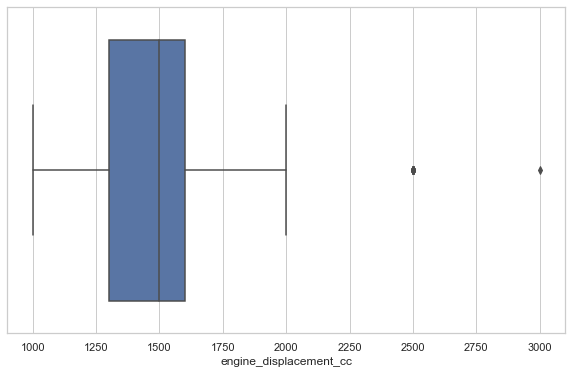

In [109]:
sns.boxplot(x=df["engine_displacement_cc"])

## cylinders

<AxesSubplot:xlabel='cylinders'>

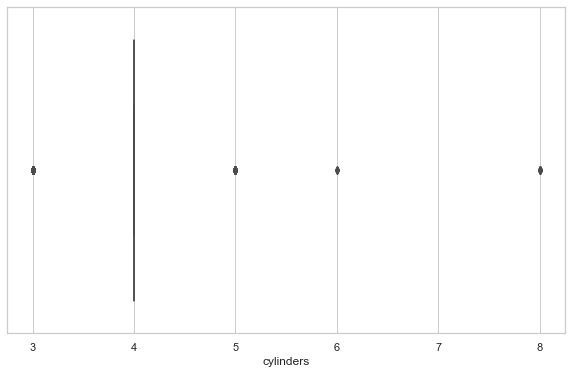

In [110]:
sns.boxplot(x=df["cylinders"])

In [54]:
df.cylinders.value_counts()

4.000    12559
3.000     3325
5.000       22
8.000        7
6.000        3
2.000        2
1.000        1
Name: cylinders, dtype: int64

In [55]:
df[(df.cylinders == 1) | (df.cylinders==2)]

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,country_version,consumption_comb,consumption_city,consumption_country,age
9956,Compact,16625.000,VAT deductible,100.000,66.000,Pre-registered,1.000,0.000,Opel,Corsa,Black,Metallic,Cloth,3.000,5.000,Automatic,1400.000,1.000,1163.000,front,Benzine,140.000,Euro 6d-TEMP,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,M...","Alloy wheels,Sport suspension","ABS,Central door lock,Daytime running lights,D...",6.000,Germany,6.002,7.800,4.900,0.000
11342,Station wagon,21900.000,VAT deductible,13600.000,100.000,Employee's car,1.000,0.000,Opel,Insignia,Grey,Metallic,Part leather,5.000,5.000,Automatic,1600.000,2.000,1623.000,front,Diesel,135.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,M...","Alloy wheels,Catalytic Converter,Touch screen,...","ABS,Central door lock with remote control,Driv...",6.000,Italy,5.012,6.500,4.100,1.000
15835,Van,47590.000,VAT deductible,6000.000,147.000,Employee's car,1.000,0.000,Renault,Espace,Black,Metallic,Full leather,5.000,7.000,Automatic,2000.000,2.000,1840.000,front,Diesel,139.000,Euro 6d-TEMP,"Air conditioning,Automatic climate control,Ele...","Bluetooth,Hands-free equipment,On-board comput...",Voice Control,"ABS,Alarm system,Blind spot monitor,Central do...",6.000,Germany,5.300,6.200,4.700,0.000


In [56]:
df.groupby(["make", "model"])["cylinders"].value_counts().head(60)

make     model     cylinders
Audi     A1        3.000        2129
                   4.000         484
                   8.000           1
         A2        4.000           1
         A3        4.000        2703
                   3.000         373
                   5.000          21
Opel     Astra     4.000        2114
                   3.000         412
         Corsa     4.000        2209
                   3.000           9
                   1.000           1
         Insignia  4.000        2594
                   6.000           3
                   2.000           1
Renault  Clio      4.000        1436
                   3.000         402
                   5.000           1
         Duster    4.000          34
         Espace    4.000         984
                   8.000           6
                   2.000           1
Name: cylinders, dtype: int64

In [57]:
df.loc[(df.cylinders ==1)|(df.cylinders ==2), "cylinders"] = 4.0

## weight_kg

In [58]:
detect_outlier("weight_kg")

column name :  weight_kg
----------------------------------------
Q1 :  1180.0
Q3 :  1472.0
IQR :  292.0
mean :  1345.4
median :  1308.0
lower limit :  742.0
upper limit :  1910.0
count of lower values :  3
count of upper values :  89
 
the smallest 10 values :
 12779     1.000
8355      1.000
1143    102.000
8857    840.000
14313   900.000
13555   977.000
13513   977.000
13937   980.000
14105   980.000
13996   980.000
Name: weight_kg, dtype: float64
 
the biggest 10 values :
 15678   2471.000
15185   2471.000
15231   2471.000
14975   2471.000
15280   2471.000
10646   2450.000
10638   2450.000
15133   2410.000
15136   2410.000
15143   2410.000
Name: weight_kg, dtype: float64





<AxesSubplot:xlabel='weight_kg'>

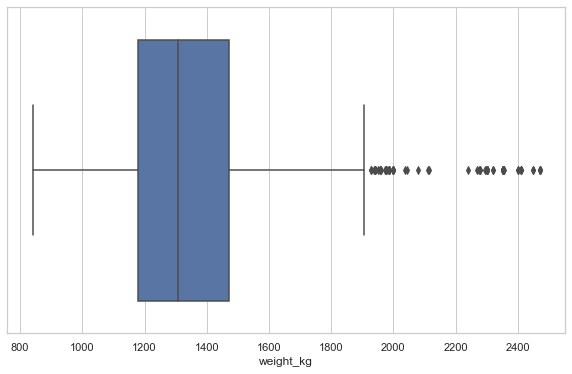

In [112]:
sns.boxplot(x=df["weight_kg"])

In [59]:
df[df.weight_kg < 103]

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,country_version,consumption_comb,consumption_city,consumption_country,age
1143,Compact,19229.000,VAT deductible,8263.000,70.000,Used,1.000,1.000,Audi,A1,Beige,Metallic,Cloth,5.000,4.000,Automatic,1000.000,3.000,102.000,front,Benzine,102.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Catalytic Converter,Sport seats,S...","ABS,Central door lock,Daytime running lights,D...",7.000,Unknown,4.600,5.600,3.987,1.000
8355,Compact,12945.000,VAT deductible,2015.000,66.000,Used,1.000,0.000,Opel,Corsa,Silver,Metallic,Cloth,5.000,5.000,Automatic,1400.000,4.000,1.000,front,Benzine,112.000,Euro 6,"Air conditioning,Electrical side mirrors,Hill ...",Radio,Catalytic Converter,"ABS,Central door lock,Daytime running lights,D...",5.000,Unknown,4.800,5.800,4.100,1.000
12779,Station wagon,39299.000,VAT deductible,10.000,121.000,New,0.000,0.000,Opel,Insignia,Black,Metallic,Cloth,5.000,5.000,Manual,1500.000,4.000,1.000,front,Benzine,139.000,Euro 6,"Heated steering wheel,Hill Holder,Park Distanc...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Roof rack,Touch screen,Voice Control","Fog lights,Lane departure warning system",6.000,Netherlands,6.112,7.600,5.200,0.000


In [60]:
df.loc[df.weight_kg < 103, "weight_kg"] = np.nan

In [61]:
df.weight_kg.isnull().sum()

3

In [62]:
df.weight_kg = df.groupby(["make", "model","body_type"])["weight_kg"].apply(lambda x : x.fillna(x.mean()))

In [63]:
df.weight_kg.isnull().sum()

0

<AxesSubplot:xlabel='weight_kg'>

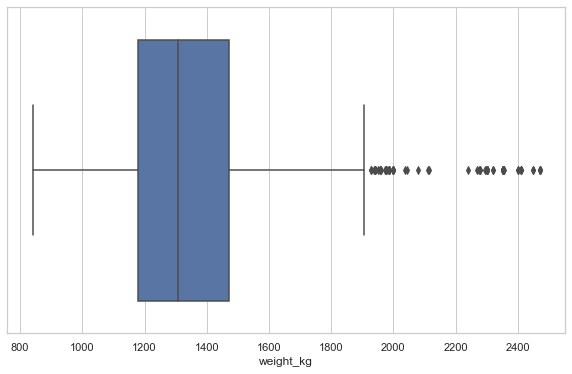

In [113]:
sns.boxplot(x=df["weight_kg"])

## co2e_g

In [64]:
detect_outlier("co2e_g")

column name :  co2e_g
----------------------------------------
Q1 :  104.0
Q3 :  128.0
IQR :  24.0
mean :  122.68
median :  117.0
lower limit :  68.0
upper limit :  164.0
count of lower values :  7
count of upper values :  247
 
the smallest 10 values :
 8110    14.000
3617    36.000
3615    36.000
3612    36.000
3356    36.000
12547   45.000
9798    51.000
7857    80.000
13668   82.000
8912    82.000
Name: co2e_g, dtype: float64
 
the biggest 10 values :
 11888   14457.000
12343   13983.000
8542    12324.000
6578    12087.000
6579    12087.000
5818    12087.000
4089     1060.000
4556      990.000
535       331.000
10513     253.000
Name: co2e_g, dtype: float64





<AxesSubplot:xlabel='co2e_g'>

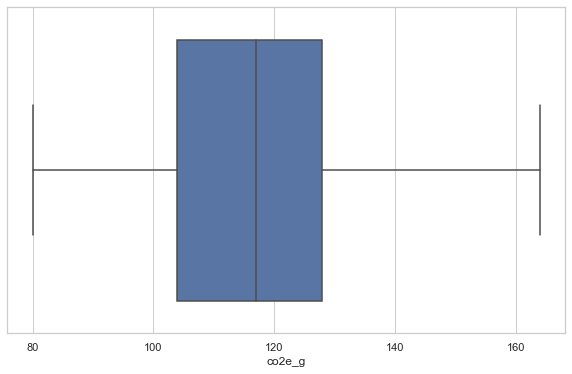

In [114]:
sns.boxplot(x=df["co2e_g"])

In [65]:
df[df.co2e_g > 164].sort_values(by="co2e_g", ascending=True)

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,country_version,consumption_comb,consumption_city,consumption_country,age
8830,Other,13890.000,VAT deductible,10.000,66.000,Pre-registered,1.000,0.000,Opel,Corsa,Black,Metallic,Cloth,4.000,5.000,Automatic,1400.000,4.000,1163.000,front,Benzine,165.000,Euro 6d-TEMP,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",6.000,Unknown,6.600,8.200,5.700,1.000
11469,Station wagon,20250.000,VAT deductible,17450.000,125.000,Used,1.000,0.000,Opel,Insignia,White,Metallic,Other,4.000,5.000,Automatic,1600.000,4.000,1623.000,front,Benzine,166.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,On-board computer,Radio","Alloy wheels,Roof rack","ABS,Central door lock,Daytime running lights,D...",8.000,Unknown,6.212,7.700,5.300,2.000
10511,Station wagon,17999.000,VAT deductible,46100.000,125.000,Used,2.000,0.000,Opel,Insignia,Silver,Metallic,Cloth,5.000,5.000,Automatic,1600.000,4.000,1701.000,front,Benzine,166.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","CD player,On-board computer,Radio","Alloy wheels,Cab or rented Car,Roof rack,Touch...","ABS,Adaptive headlights,Blind spot monitor,Cen...",6.000,Germany,7.320,9.800,5.800,2.000
10545,Station wagon,17850.000,VAT deductible,14040.000,125.000,Used,1.000,0.000,Opel,Insignia,Black,Metallic,Cloth,4.000,5.000,Automatic,1600.000,4.000,1623.000,front,Benzine,166.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",Roof rack,"ABS,Central door lock,Daytime running lights,D...",6.000,Germany,6.200,7.832,5.200,2.000
12463,Station wagon,37490.000,VAT deductible,50.000,125.000,New,0.000,1.000,Opel,Insignia,Grey,Metallic,Cloth,5.000,5.000,Automatic,2000.000,4.000,1623.000,front,Diesel,166.000,Euro 6d-TEMP,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,M...","Alloy wheels,Roof rack","ABS,Adaptive Cruise Control,Adaptive headlight...",8.000,Germany,6.300,8.300,5.200,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6578,Station wagon,17850.000,VAT deductible,29900.000,110.000,Used,1.000,0.000,Opel,Astra,Green,Metallic,Cloth,5.000,5.000,Automatic,1400.000,4.000,1393.000,front,Benzine,12087.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Roof rack,Voi...","ABS,Central door lock,Daytime running lights,D...",6.000,Germany,5.100,6.300,4.300,1.000
5818,Sedans,14990.000,VAT deductible,85182.000,110.000,Used,1.000,0.000,Opel,Astra,Brown,Metallic,Cloth,5.000,5.000,Automatic,1400.000,4.000,1308.000,front,Benzine,12087.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Catalytic Converter","ABS,Central door lock,Daytime running lights,D...",6.000,Germany,5.100,6.300,4.300,3.000
8542,Compact,10950.000,VAT deductible,34800.000,66.000,Used,2.000,1.000,Opel,Corsa,Blue,Metallic,Cloth,3.000,5.000,Automatic,1400.000,4.000,1163.000,front,Benzine,12324.000,Euro 6,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Catalytic Converter","ABS,Central door lock,Daytime running lights,D...",6.000,Germany,5.200,6.700,4.200,3.000
12343,Sedans,19950.000,VAT deductible,15018.000,103.000,Used,1.000,1.000,Opel,Insignia,White,Metallic,Cloth,5.000,5.000,Manual,1500.000,4.000,1503.000,front,Benzine,13983.000,Euro 6,"Air conditioning,Armrest,Automatic c

In [66]:
from scipy.stats.mstats import winsorize

In [67]:
Q1 = df.co2e_g.quantile(0.25)
Q3 = df.co2e_g.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [68]:
a = len(df.co2e_g[df.co2e_g < lower_limit])/len(df)
a

0.00043972611344933726

In [69]:
b = len(df.co2e_g[df.co2e_g>upper_limit])/len(df)
b

0.0155160500031409

In [70]:
winsorize(df.co2e_g, (a, b))

masked_array(data=[ 99., 129.,  99., ..., 139., 139., 153.],
             mask=False,
       fill_value=1e+20)

In [71]:
table_win = winsorize(df.co2e_g, (a,b))
table_win

masked_array(data=[ 99., 129.,  99., ..., 139., 139., 153.],
             mask=False,
       fill_value=1e+20)

In [72]:
table_win_ser = pd.Series(table_win)
table_win_ser

0        99.000
1       129.000
2        99.000
3        99.000
4       109.000
          ...  
15914   139.000
15915   164.000
15916   139.000
15917   139.000
15918   153.000
Length: 15919, dtype: float64

In [73]:
df.co2e_g = table_win_ser

In [74]:
df.co2e_g.sort_values(ascending=False)

12503   164.000
12492   164.000
12490   164.000
12665   164.000
12664   164.000
          ...  
7857     80.000
3615     80.000
3612     80.000
3356     80.000
9798     80.000
Name: co2e_g, Length: 15919, dtype: float64

<AxesSubplot:xlabel='co2e_g'>

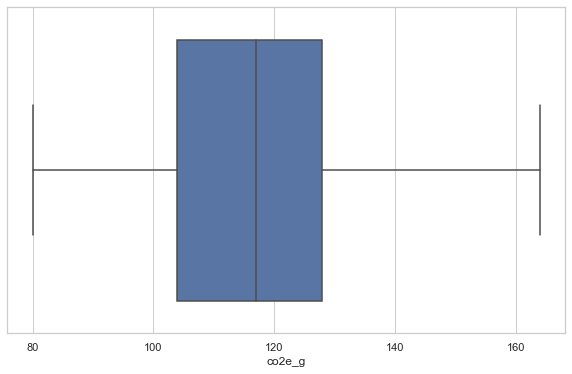

In [115]:
sns.boxplot(x=df["co2e_g"])

## gears

<AxesSubplot:xlabel='gears'>

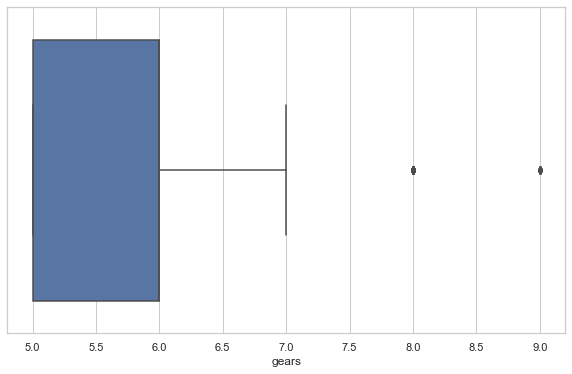

In [116]:
sns.boxplot(x=df["gears"])

In [75]:
df.gears.value_counts()

6.000     8370
5.000     4398
7.000     2843
8.000      288
9.000       11
3.000        3
1.000        2
4.000        2
2.000        1
50.000       1
Name: gears, dtype: int64

In [76]:
df[df.gears <= 4]


,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,country_version,consumption_comb,consumption_city,consumption_country,age
8921,Compact,11000.000,VAT deductible,24000.000,66.000,Used,1.000,1.000,Opel,Corsa,Blue,Metallic,Cloth,5.000,5.000,Semi-automatic,1400.000,4.000,1163.000,front,Benzine,112.000,Euro 6d,"Air conditioning,Light sensor,Multi-function s...","Bluetooth,On-board computer,Radio,USB","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",1.000,Belgium,4.800,5.800,4.100,1.000
9812,Sedans,9880.000,VAT deductible,19247.000,51.000,Used,1.000,1.000,Opel,Corsa,Grey,Metallic,Cloth,5.000,5.000,Manual,1300.000,4.000,1163.000,front,Benzine,128.000,Euro 6,"Air conditioning,Light sensor,Navigation syste...","Bluetooth,On-board computer",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Fog l...",2.000,Unknown,5.298,6.600,4.500,1.000
14375,Compact,23990.000,VAT deductible,10.000,147.000,Demonstration,1.000,1.000,Renault,Clio,White,Metallic,Part leather,4.000,5.000,Automatic,1800.000,4.000,1288.000,front,Benzine,120.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,On-board computer","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Central door lock,Daytime running lights,D...",1.000,Austria,5.374,6.800,4.500,1.000
15817,Van,54204.000,VAT deductible,11.000,146.000,New,0.000,0.000,Renault,Espace,White,Metallic,Part leather,5.000,5.000,Automatic,2000.000,4.000,1779.000,front,Diesel,120.000,Euro 6d-TEMP,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",3.000,Netherlands,5.400,6.300,4.900,0.000
15822,Van,50950.000,VAT deductible,11.000,165.000,New,0.000,0.000,Renault,Espace,Grey,Metallic,Cloth,5.000,5.000,Automatic,1800.000,4.000,1647.000,front,Benzine,153.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",4.000,Netherlands,7.600,9.900,6.400,0.000
15823,Van,50950.000,VAT deductible,11.000,165.000,New,0.000,0.000,Renault,Espace,Grey,Metallic,Cloth,5.000,5.000,Automatic,1800.000,4.000,1647.000,front,Benzine,153.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",4.000,Netherlands,7.600,9.900,6.400,0.000
15845,Van,46660.000,VAT deductible,11.000,118.000,New,0.000,0.000,Renault,Espace,White,Metallic,Part leather,5.000,5.000,Automatic,2000.000,4.000,1733.000,front,Diesel,120.000,Euro 6d-TEMP,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",3.000,Netherlands,5.100,5.700,4.800,0.000
15846,Van,46490.000,VAT deductible,1000.000,165.000,Demonstration,1.000,0.000,Renault,Espace,Black,Metallic,Full leather,4.000,7.000,Automatic,1800.000,4.000,1685.000,front,Benzine,164.000,Euro 6d-TEMP,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Adaptive headlight...",3.000,Germany,7.600,9.900,6.400,0.000


In [77]:
df.loc[df.gears == 50, "gears"] = 5

In [78]:
df.loc[df.gears <= 4, "gears"] = np.nan

In [79]:
df.gears = df.groupby(["make", "model", "body_type"])["gears"].apply(lambda x : x.fillna(x.mode()[0]))

In [80]:
df.gears.isnull().sum()

0

<AxesSubplot:xlabel='gears'>

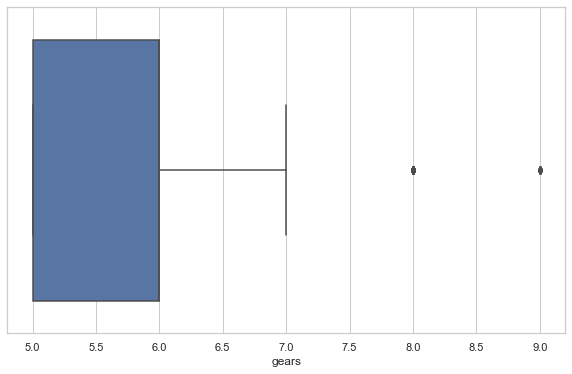

In [117]:
sns.boxplot(x=df["gears"])

## consumption_comb

In [81]:
detect_outlier("consumption_comb")

column name :  consumption_comb
----------------------------------------
Q1 :  4.1
Q3 :  5.4
IQR :  1.3000000000000007
mean :  4.83
median :  4.8
lower limit :  2.1499999999999986
upper limit :  7.350000000000001
count of lower values :  4
count of upper values :  130
 
the smallest 10 values :
 13678   1.200
3615    1.600
3617    1.600
3612    1.600
8872    3.100
8904    3.100
8874    3.100
8566    3.100
8912    3.100
13680   3.100
Name: consumption_comb, dtype: float64
 
the biggest 10 values :
 535     13.800
10513    9.714
10771    9.100
12529    8.700
10817    8.700
10819    8.700
12054    8.700
12530    8.600
10789    8.600
12422    8.600
Name: consumption_comb, dtype: float64





<AxesSubplot:xlabel='consumption_comb'>

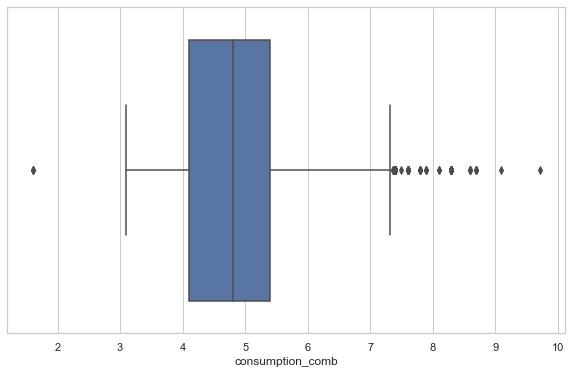

In [118]:
sns.boxplot(x=df["consumption_comb"])

In [82]:
df.groupby(["make", "model", "body_type"])["consumption_comb"].median()

make     model     body_type    
Audi     A1        Compact         4.400
                   Coupe           3.802
                   Other           4.800
                   Sedans          4.200
                   Station wagon   4.200
                   Van             5.074
         A2        Off-Road        4.900
         A3        Compact         4.100
                   Convertible     4.800
                   Coupe           3.900
                   Other           4.150
                   Sedans          4.032
                   Station wagon   4.500
Opel     Astra     Compact         4.300
                   Coupe           6.200
                   Off-Road        5.600
                   Other           4.294
                   Sedans          4.800
                   Station wagon   4.500
         Corsa     Compact         5.600
                   Coupe           5.300
                   Off-Road        5.200
                   Other           5.200
                   Sedan

In [83]:
df.consumption_comb.iloc[[13678]] = 3.35

In [84]:
df.consumption_comb.iloc[[535]] = 4.400

In [85]:
df.drop(columns=["consumption_city", "consumption_country"], inplace=True)

<AxesSubplot:xlabel='consumption_comb'>

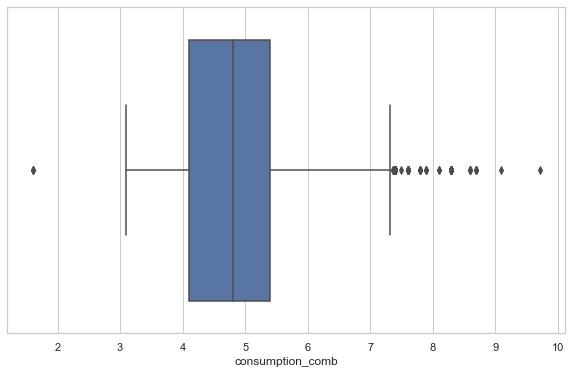

In [119]:
sns.boxplot(x=df["consumption_comb"])

## age

In [86]:
df.age.value_counts()

1.000    4525
0.000    4412
3.000    3674
2.000    3308
Name: age, dtype: int64

In [88]:
df.to_csv("without_outliers_autoscout.csv", index=False)

In [89]:
col_o = ['body_type','vat','type', 'previous_owners', 'warranty', 'make', 'model', 
         'body_color', 'paint_type', 'upholstery','gearing_type', 'drive_chain', 
         'fuel', 'emission_class', 'comfort&convenience', 'entertainment&media',
         'extras', 'safety&security', 'country_version']

In [90]:
def control_outlier(col) :
    print("column name : ",col)
    print("--"*20)
    print(get_diff_category_column(df[col]))
    print("**"*40)
    print("\n\n")

In [91]:
for i in col_o:
    control_outlier(i)

column name :  body_type
----------------------------------------
{0: 'Compact', 1: 'Convertible', 2: 'Coupe', 3: 'Off-Road', 4: 'Other', 5: 'Sedans', 6: 'Station wagon', 7: 'Transporter', 8: 'Van'}
********************************************************************************



column name :  vat
----------------------------------------
{0: 'Price negotiable', 1: 'VAT deductible'}
********************************************************************************



column name :  type
----------------------------------------
{0: 'Demonstration', 1: "Employee's car", 2: 'New', 3: 'Pre-registered', 4: 'Used'}
********************************************************************************



column name :  previous_owners
----------------------------------------
{0: '0.0', 1: '1.0', 2: '2.0', 3: '3.0', 4: '4.0'}
********************************************************************************



column name :  warranty
----------------------------------------
{0: '0.0', 1: '1.0'}
******

## Final (Heatmap)

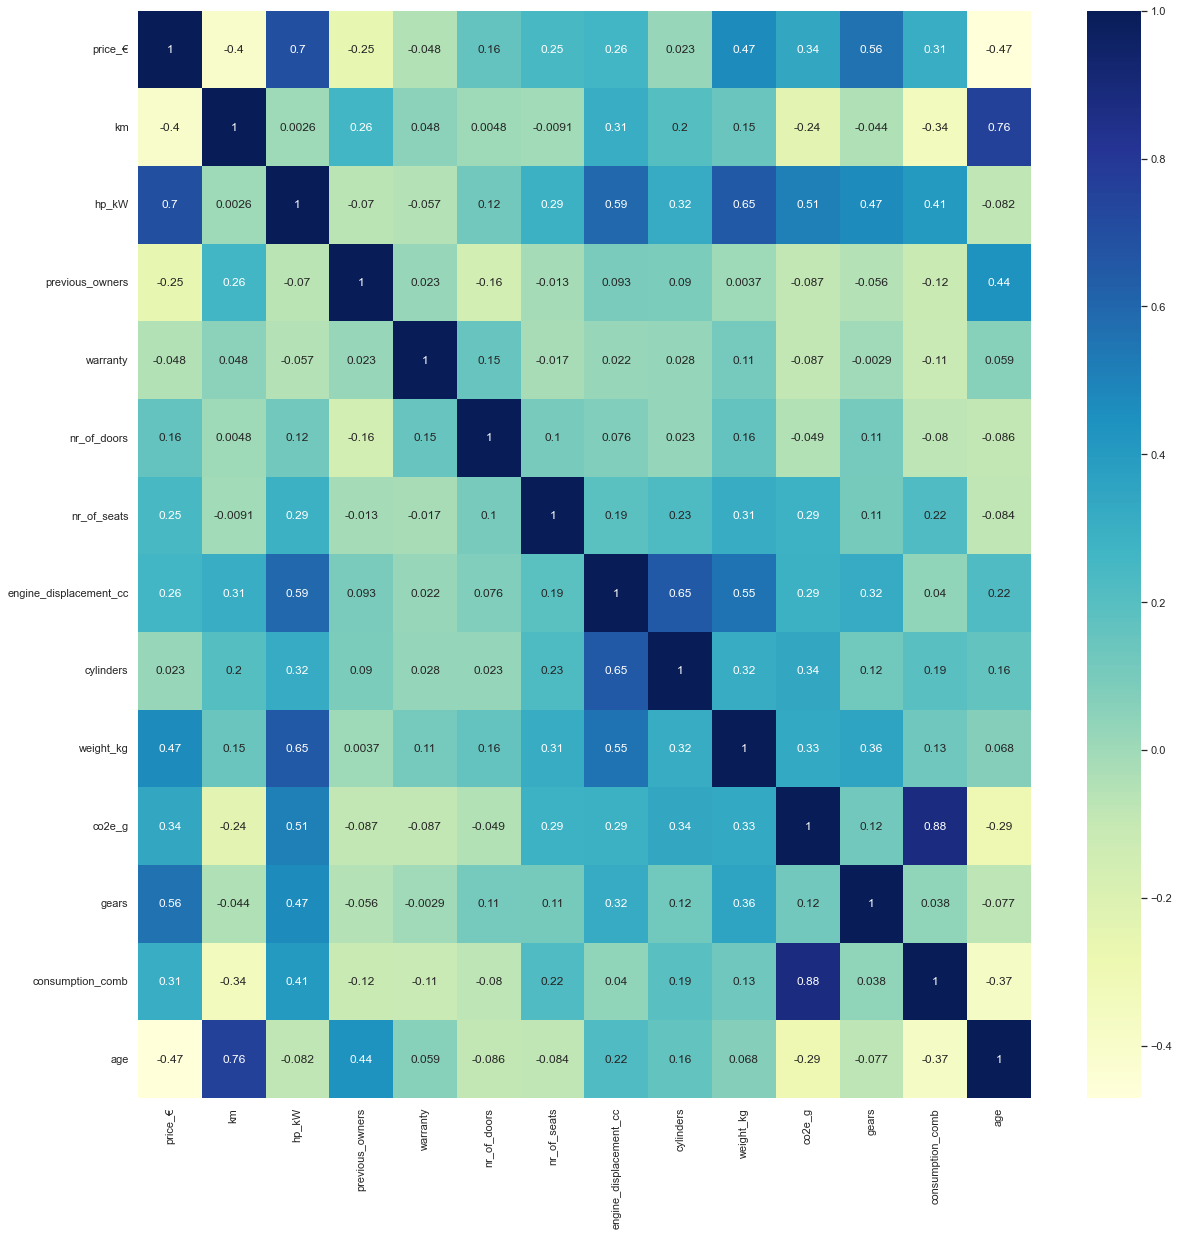

In [121]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu");